In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt
/kaggle/input/social-recommendation-data/lthing_data/lthing_data/edges.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/network_trust.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/network_trustedby.txt
/kaggle/input/social-recommendation-data/epinions_data/epinions_data/epinions.txt


# Data Loading

In [2]:
import os

s = ''
with open('/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt') as file:
    s = file.read()
    s = s.split('\n')
    print(len(s))
    s = s[1:500000]

1707072


In [3]:
reviews_file = '/kaggle/input/social-recommendation-data/lthing_data/lthing_data/reviews.txt'

In [4]:
with open(reviews_file, 'r') as file:
    for _ in range(3):  
        print(file.readline())

reviews = {}

reviews[('73960', 'Elizabeth.Wong98')] = {'comment': "Every evening, the brave queen of Persia, Shahrazad, goes into the Sultan's rooms and begins a weave of words, hoping to entice the Sultan to let her live another night so she can continue her story. But Shahrazad has a big problem: She is running out of stories. With a delicate stroke of luck, a cripple girl, Marjan, ventures into the harem with her Aunt to sell various wares. As her Aunt is selling things, Marjan entertains some of the children with a story. Unbeknownst to Marjan, Shahrazad's sister, Dunyazad, has heard her telling the story. Marjan is taken directly to Shahrazad and asked to recount the story. The tale keeps the queen alive another night and the queen decides to keep Marjan.\n As her helper, Marjan has to go into the city and look for tales that the Sultan has not heard. She has several close calls with the Kathun, the voracious female who rules the harem and who is set against \nShahrazad. Finally 

In [5]:
# for key, value in list(reviews.items())[:5]:
#     print(f"Key: {key}, Value: {value}")
#     print("------------")

## Data Formatting

In [6]:
import ast
import pandas as pd

# Initialize an empty list to store review data
data = []

with open(reviews_file, 'r') as file:
    for line in file:
        if line.strip().startswith("reviews["):  # Skip lines assigning 'reviews'
            key_value = line.strip().split(" = ", 1)[1]  # Extract dictionary part
            review_entry = ast.literal_eval(key_value)
            data.append(review_entry)

# Convert the list of dictionaries directly into a DataFrame
reviews_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(reviews_df.head())

                                             comment  nhelpful      unixtime  \
0  Every evening, the brave queen of Persia, Shah...         0  1.332288e+09   
1  Its the 1983-84 school year and Edward Zanni o...         0  1.253405e+09   
2  I became privy to this book, when another auth...         0  1.299888e+09   
3                                              .             0  1.327277e+09   
4  This is a tremendous story of a freed woman an...         0  1.329005e+09   

       work flags              user  stars          time  
0     73960    []  Elizabeth.Wong98    4.5  Mar 21, 2012  
1     69413    []            rivkat    3.0  Sep 20, 2009  
2   9523995    []      suz.haugland    4.0  Mar 12, 2011  
3    368228    []        amoskovacs    4.0  Jan 23, 2012  
4  11243828    []            CandyH    4.0  Feb 12, 2012  


In [7]:
reviews_df

,comment,nhelpful,unixtime,work,flags,user,stars,time
0,"Every evening, the brave queen of Persia, Shah...",0,1.332288e+09,73960,[],Elizabeth.Wong98,4.5,"Mar 21, 2012"
1,Its the 1983-84 school year and Edward Zanni o...,0,1.253405e+09,69413,[],rivkat,3.0,"Sep 20, 2009"
2,"I became privy to this book, when another auth...",0,1.299888e+09,9523995,[],suz.haugland,4.0,"Mar 12, 2011"
3,.,0,1.327277e+09,368228,[],amoskovacs,4.0,"Jan 23, 2012"
4,This is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,[],CandyH,4.0,"Feb 12, 2012"
...,...,...,...,...,...,...,...,...
1707065,This is quite possibly the cutest kids book I'...,0,1.327795e+09,129503,[],evementen,NaN,"Jan 29, 2012"
1707066,This is a fairy tale which is very much a Cupi...,0,1.364688e+09,11749693,[],AmyMacEvilly,5.0,"Mar 31, 2013"
1707067,http://tamaranth.blogspot.com/1994/03/guilty-p...,0,1.176682e+09,4873693,[],tamaranth,4.5,"Apr 16, 2007"
1707068,Despus del extraordinario xito de Los ojos ama...,0,1.321920e+09,9705446,[],bibliosa,NaN,"Nov 22, 2011"


In [8]:
# Save the DataFrame to a CSV file
reviews_df[:10].to_csv('/kaggle/working/reviews_processed10.csv', index=False)

In [9]:
edges_file = '/kaggle/input/social-recommendation-data/lthing_data/lthing_data/edges.txt'

In [10]:
with open(edges_file, 'r') as file:
    for _ in range(3):  
        print(file.readline())

Rodo anehan

Rodo sevilemar

Rodo dingsi



In [11]:
# Load edges into a DataFrame
edges_data = []
with open(edges_file, 'r') as file:
    for line in file:
        users = line.strip().split()  # Split by whitespace to get the two usernames
        if len(users) == 2:  # Ensure only valid pairs
            edges_data.append(users)

edges_df = pd.DataFrame(edges_data, columns=['user1', 'user2'])

In [12]:
edges_df

,user1,user2
0,Rodo,anehan
1,Rodo,sevilemar
2,Rodo,dingsi
3,Rodo,slash
4,RelaxedReader,AnnRig
...,...,...
219785,Capfox,lampbane
219786,Capfox,maberry
219787,Capfox,raphinou
219788,Capfox,library1359


In [13]:
merged_df = edges_df.merge(reviews_df, left_on='user1', right_on='user', how='left')

# Display merged data
print(merged_df.head())

  user1   user2                                            comment  nhelpful  \
0  Rodo  anehan  This book is enjoyable, but it doesn't quite m...         0   
1  Rodo  anehan  All traditions were new once upon a time. This...         0   
2  Rodo  anehan  I really can't recommend this books. I wanted ...         1   
3  Rodo  anehan  I didn't expect much of this book when I bough...         0   
4  Rodo  anehan  If you are expecting a logical explanation of ...         0   

       unixtime     work flags  user  stars          time  
0  1.250122e+09  2926113    []  Rodo    3.0  Aug 13, 2009  
1  1.240963e+09   162191    []  Rodo    4.0  Apr 29, 2009  
2  1.239667e+09  2044763    []  Rodo    1.0  Apr 14, 2009  
3  1.239667e+09  3116531    []  Rodo    1.5  Apr 14, 2009  
4  1.240790e+09    58874    []  Rodo    3.5  Apr 27, 2009  


In [14]:
# # Save the merged data if needed
# merged_df.to_csv('/kaggle/working/merged_edges_reviews.csv', index=False)
# # Save the merged data if needed
merged_df[:10].to_csv('/kaggle/working/merged_edges_reviews_10.csv', index=False)

# EDA

In [15]:
connection_counts = edges_df['user1'].value_counts()
print(connection_counts.head(10))  # Top 10 users with the most connections

user1
theoldman           3776
rolandperkins       2786
gangleri             704
carterchristian1     603
edlynskey            557
Autodafe             534
AllieW               526
amanaceerdh          479
angrystarlyt         404
Kushana              389
Name: count, dtype: int64


In [16]:
#Review Sentiment by Network
avg_rating_per_user = merged_df.groupby('user1')['stars'].mean().reset_index()
avg_rating_per_user.columns = ['user1', 'avg_rating']
print(avg_rating_per_user.head())

           user1  avg_rating
0      -AlyssaE-    4.000000
1       -HarryH-    4.500000
2  -LoveofBooks-    4.166667
3         -MiSa-    2.500000
4         -Mimi-    4.192308


In [17]:
helpful_votes_per_user = merged_df.groupby('user1')['nhelpful'].sum().reset_index()
helpful_votes_per_user.columns = ['user1', 'total_helpful_votes']
print(helpful_votes_per_user.sort_values(by='total_helpful_votes', ascending=False).head())

              user1  total_helpful_votes
21949  richardderus               514416
9001       Whisper1               474369
25217     wisewoman               316830
11377        brenzi               198774
12792       danielx               198320


In [18]:
import networkx as nx
# Create a graph from edges
G = nx.from_pandas_edgelist(edges_df, source='user1', target='user2')

# Find centrality measures (influential users)
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10 influential users

[('theoldman', 0.05178557889150049), ('rolandperkins', 0.04197437258321328), ('Smethers', 0.010599742209416937), ('carterchristian1', 0.00902267040715748), ('edlynskey', 0.008431268481310183), ('Autodafe', 0.008082492986579726), ('gangleri', 0.008006672226855712), ('amanaceerdh', 0.007764045795738873), ('AllieW', 0.007400106149063613), ('angrystarlyt', 0.006202138145424217)]


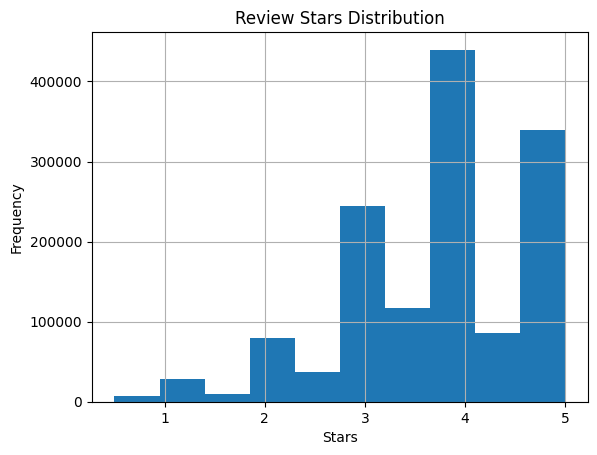

In [19]:
import matplotlib.pyplot as plt
reviews_df['stars'].hist(bins=10)
plt.title('Review Stars Distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

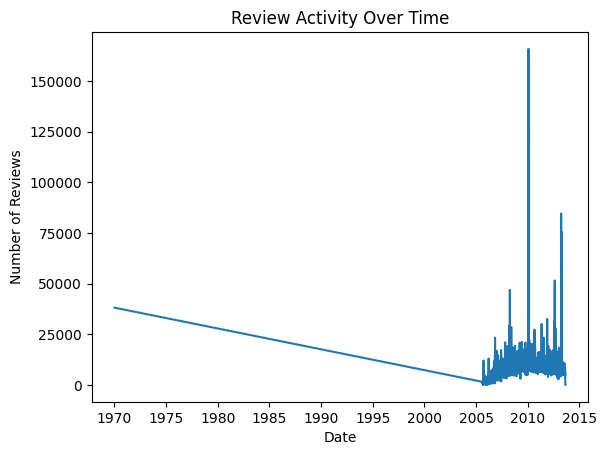

In [20]:
merged_df['review_date'] = pd.to_datetime(merged_df['unixtime'], unit='s')
review_activity = merged_df.groupby(merged_df['review_date'].dt.date).size()
review_activity.plot(kind='line', title='Review Activity Over Time', xlabel='Date', ylabel='Number of Reviews')
plt.show()

# Analysis/ Interpretation

1. Top Users by Connections:        
*  Most Connected Users: The users theoldman, rolandperkins, and gangleri have the highest number of social connections.These users are likely central figures in the social network, suggesting they interact widely or have substantial influence.          

2. User Review Behavior: 
* Average Ratings by User:    The users show varying average ratings, reflecting different reviewing tendencies.    Users like -HarryH- (average rating 4.5) tend to give higher ratings, indicating they either enjoy most works or are lenient reviewers.
* Helpful Votes:    Users such as richardderus and Whisper1 have accumulated a significant number of helpful votes, indicating their reviews are widely read and considered useful by others.
  These users might be considered thought leaders in the community.                     
3. Network Centrality
* Degree Centrality:Users like theoldman, rolandperkins, and Smethers are influential within the social graph, with high centrality scores. They likely act as hubs, bridging multiple smaller user groups.

4. Review Star Distribution 
* The histogram shows that most reviews are positive, with many 4- and 5-star ratings.This indicates that users are generally satisfied with the works they are reviewing, or there may be some bias towards positive reviews.

5. Review Activity Over Time 
* The sharp increase in review activity from around 2005 to 2015 suggests the platform gained significant traction during this period.The early low-frequency activity might indicate either fewer users or missing data from earlier years.



# Data preprocessing

## User-Item

In [21]:
# Check for missing values
print(reviews_df.isnull().sum())

comment          0
nhelpful         0
unixtime        90
work             0
flags            0
user             0
stars       319861
time            90
dtype: int64


In [22]:
# Fill missing values in stars with the median rating (or other strategies depending on analysis)
reviews_df['stars'].fillna(reviews_df['stars'].median(), inplace=True)

# # Drop rows with missing comments, as they are essential for sentiment analysis
# reviews_df.dropna(subset=['comment'], inplace=True)


/tmp/ipykernel_23/2891349285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['stars'].fillna(reviews_df['stars'].median(), inplace=True)


In [23]:
reviews_df.dropna(subset=['unixtime', 'time'], inplace=True)

In [24]:
# Check for missing values
print(reviews_df.isnull().sum())

comment     0
nhelpful    0
unixtime    0
work        0
flags       0
user        0
stars       0
time        0
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

# Encoding user and work columns
user_encoder = LabelEncoder()
reviews_df['user_encoded'] = user_encoder.fit_transform(reviews_df['user'])

work_encoder = LabelEncoder()
reviews_df['work_encoded'] = work_encoder.fit_transform(reviews_df['work'])

## Feature Engineering

In [26]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


In [27]:
# from textblob import TextBlob

# # Adding sentiment polarity as a new feature
# reviews_df['sentiment'] = reviews_df['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [28]:
reviews_df['review_date'] = pd.to_datetime(reviews_df['unixtime'], unit='s')
reviews_df['year'] = reviews_df['review_date'].dt.year
reviews_df['month'] = reviews_df['review_date'].dt.month

In [29]:
reviews_df.head()

,comment,nhelpful,unixtime,work,flags,user,stars,time,user_encoded,work_encoded,review_date,year,month
0,"Every evening, the brave queen of Persia, Shah...",0,1.332288e+09,73960,[],Elizabeth.Wong98,4.5,"Mar 21, 2012",8341,417961,2012-03-21,2012,3
1,Its the 1983-84 school year and Edward Zanni o...,0,1.253405e+09,69413,[],rivkat,3.0,"Sep 20, 2009",71112,408855,2009-09-20,2009,9
2,"I became privy to this book, when another auth...",0,1.299888e+09,9523995,[],suz.haugland,4.0,"Mar 12, 2011",77120,488429,2011-03-12,2011,3
3,.,0,1.327277e+09,368228,[],amoskovacs,4.0,"Jan 23, 2012",30288,297840,2012-01-23,2012,1
4,This is a tremendous story of a freed woman an...,0,1.329005e+09,11243828,[],CandyH,4.0,"Feb 12, 2012",4864,50288,2012-02-12,2012,2


In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data for collaborative filtering (using user-item interactions)
X = reviews_df[['user_encoded', 'work_encoded', 'year', 'month']]
y = reviews_df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Collabarative Filtering

In [31]:
!pip install scikit-surprise


In [32]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

In [33]:
# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Prepare data for Surprise
data = Dataset.load_from_df(reviews_df[['user_encoded', 'work_encoded', 'stars']], reader=reader)

# Train-test split
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# Use SVD model
model = SVD()
model.fit(trainset)

# Predictions
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f"RMSE of the collaborative filtering model: {rmse:.4f}")

RMSE: 0.8065
RMSE of the collaborative filtering model: 0.8065
